# AttnLRP vs IntegratedGradients

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from src.Comparison import Comparison

In [2]:
model_attn       = AutoModelForCausalLM.from_pretrained("gpt2").cuda()
model_integrated = AutoModelForCausalLM.from_pretrained("gpt2").cuda()
tokenizer        = AutoTokenizer.from_pretrained("gpt2", use_fast=True)

In [3]:
from datasets import load_dataset

dataset = load_dataset("rajpurkar/squad_v2")

In [4]:
def Get_Prompt(idx):
    context  = dataset["train"][idx]["context"]
    question = dataset["train"][idx]["question"]
    answers  = dataset["train"][idx]["answers"]

    return "Context: " + context +" Question: " + question.rstrip(), answers["text"][0]

In [6]:
gpt_args = {
            "do_sample": True,
            "max_length": 100,
            "max_new_tokens": 100,
            "temperature": 3,
            "top_k": 50,
            "no_repeat_ngram_size": 2,
           }

In [7]:
model_attn.config.is_decoder = True
model_attn.config.task_specific_params["text-generation"] = gpt_args

In [8]:
model_integrated.config.is_decoder = True
model_integrated.config.task_specific_params["text-generation"] = gpt_args

# Tests

## Years With Space

In [5]:
prompt="""\
Context: If my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n \
Question: How old am I if my name is Mark? According to the text, if my name is Mark I am """

In [9]:
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, gpt_args)

In [11]:
output

'Context: If my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n Question: How old am I if my name is Mark? According to the text, if my name is Mark I am \xa0six years old, and if my name is Julie I am twenty-two years old. \nQuestion: How old am I if my name is Mark? According to the text, if my name is Mark I is \xa0six years old, and if my name is Julie I am twenty-two years old. \nQuestion: How old am I if my name is Mark? According to the text, if my name is Mark I is \xa0six years old, and if my name is Julie I am twenty-two years old. \nQuestion: How old am I if my name is Mark? According to the text, if my name is Mark I is \xa0six years old, and if my'

AttnLRP


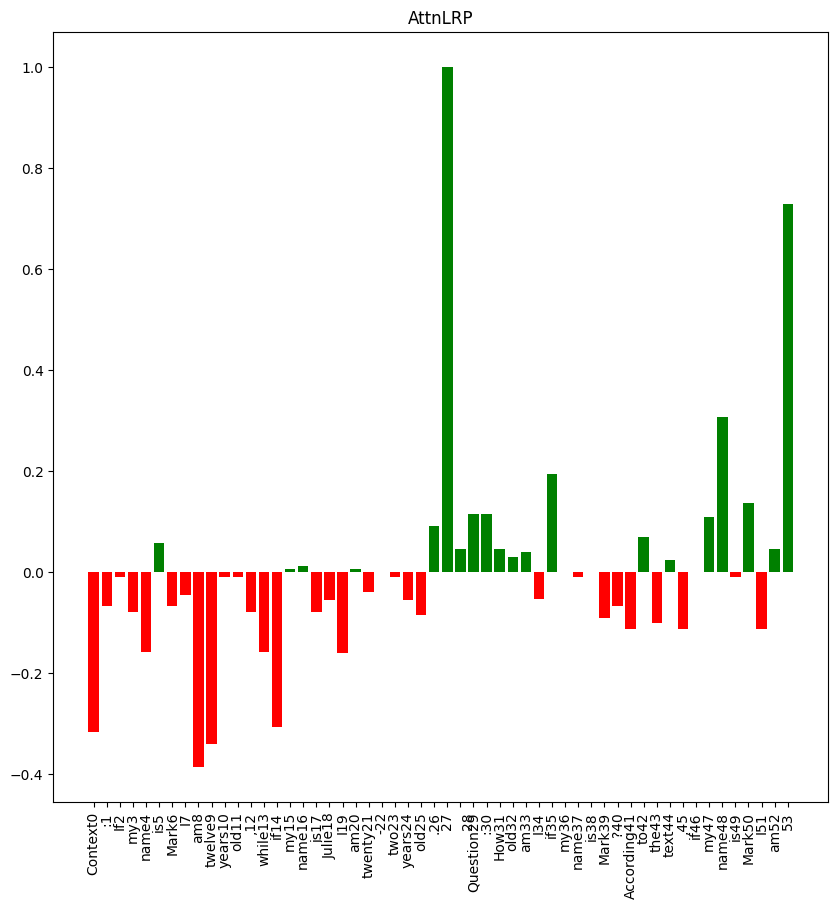

Integrated_Gradients


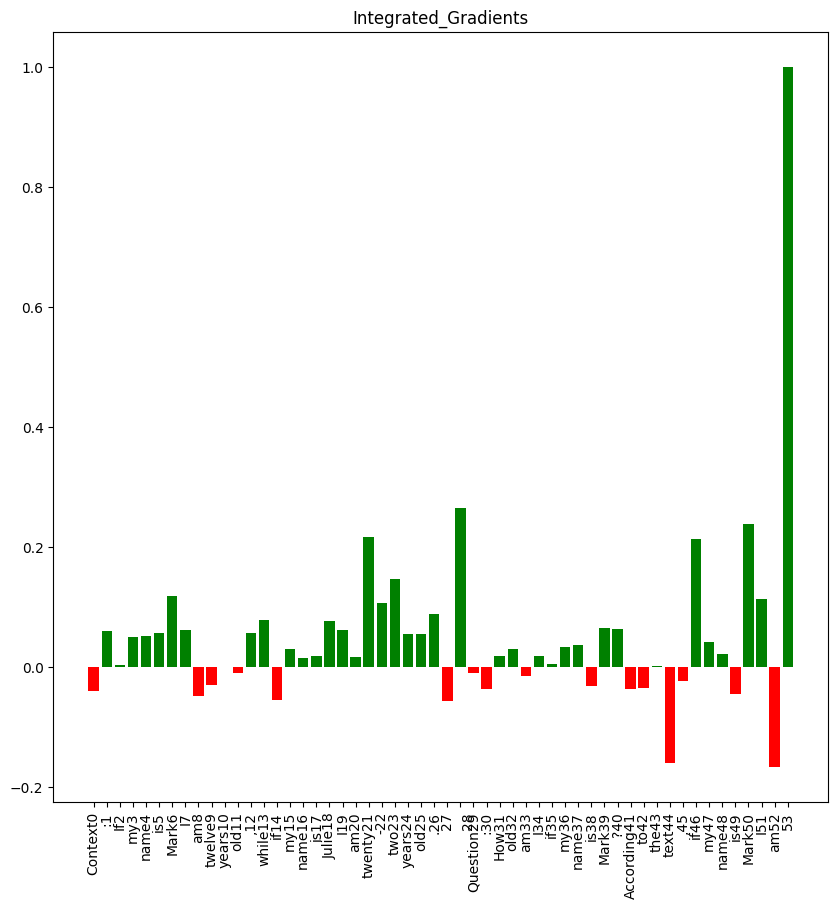

Gradient_X_Input


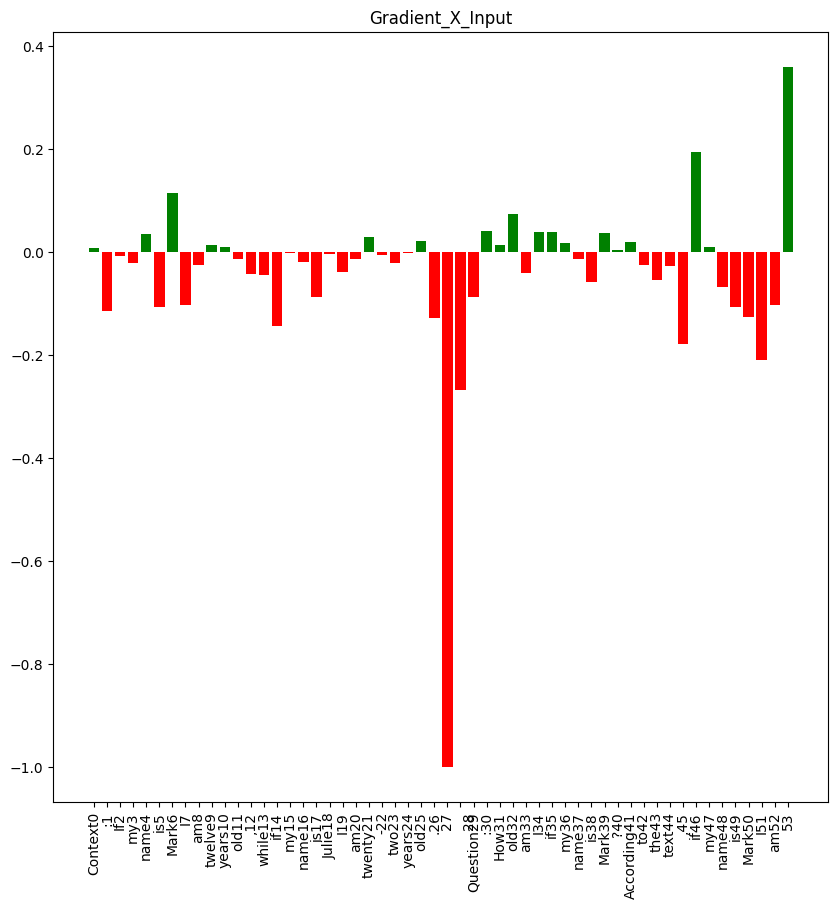

DeepLift


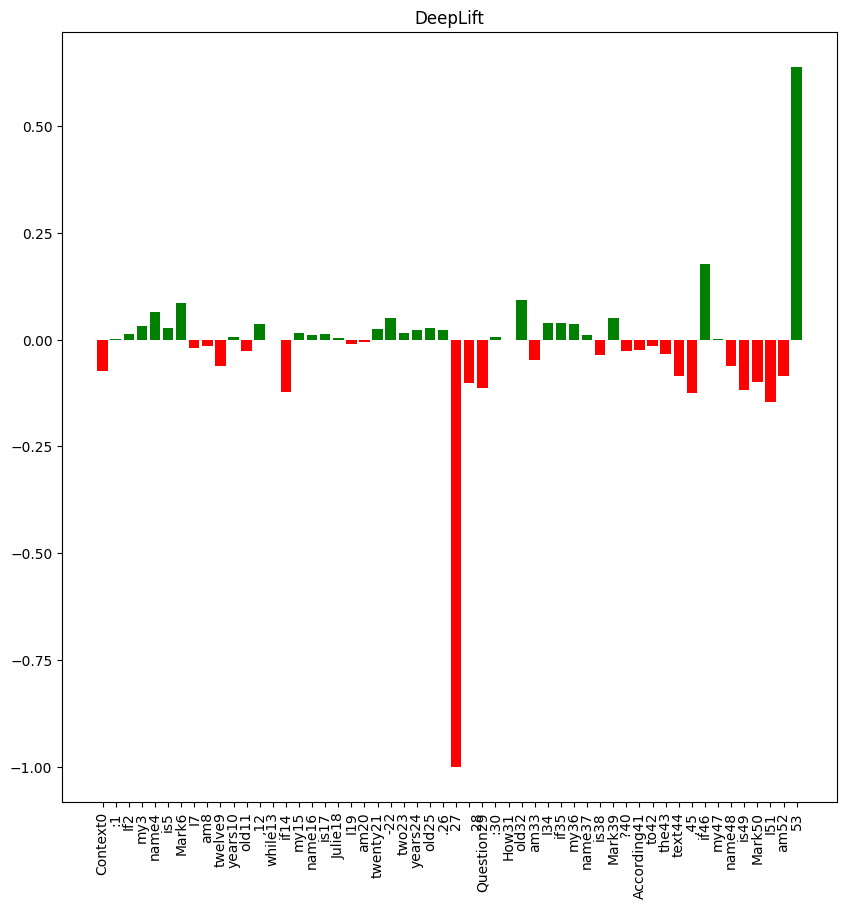

Gradient_Shap


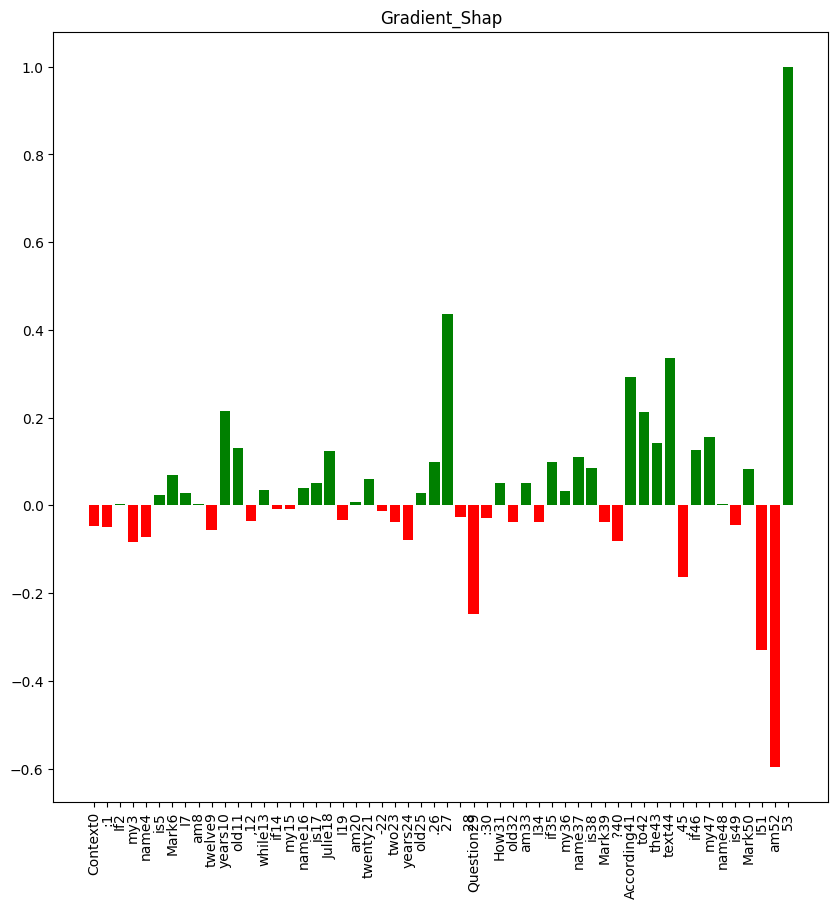

Lime


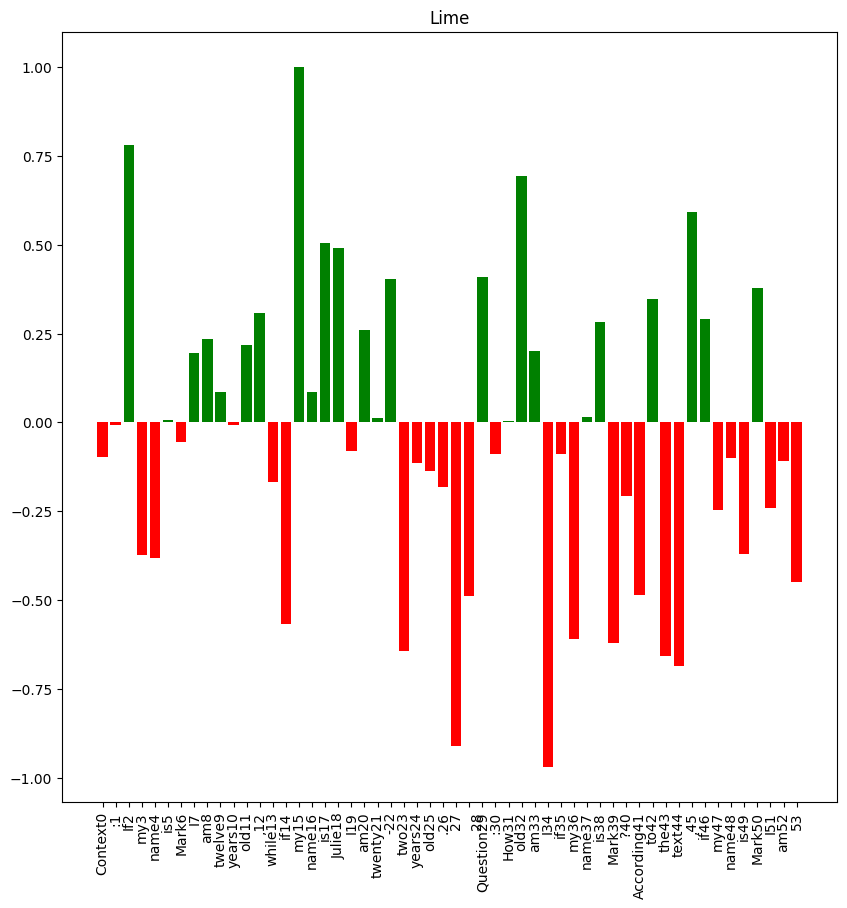

Shap


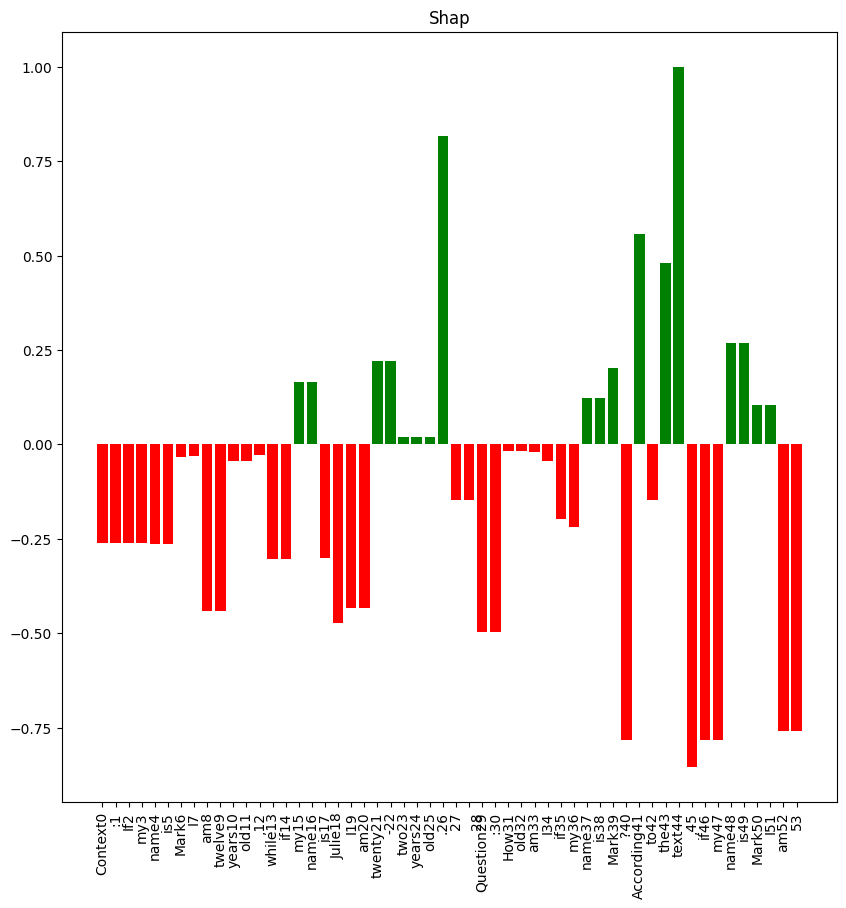

In [12]:
comp.plot(dictionary)

In [ ]:
comp.to_pdf(dictionary, name="years_space_")

## Years Without Space

In [14]:
prompt="""\
Context: If my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n \
Question: How old am I if my name is Mark? According to the text, if my name is Mark I am"""

In [ ]:
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, gpt_args)

In [20]:
output

'Context: If my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n Question: How old am I if my name is Mark? According to the text, if my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n\nQuestion: How old am I if my name is Mark? According to the text, if my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n\nQuestion: How old am I if my name is Mark? According to the text, if my name is Mark I am twelve years old, while if my name is Julie I am twenty-two years old. \n\nQuestion: How old am I if my name is Mark? According to the text, if my name is Mark I am twelve years old, while if my name is Julie I am'

AttnLRP


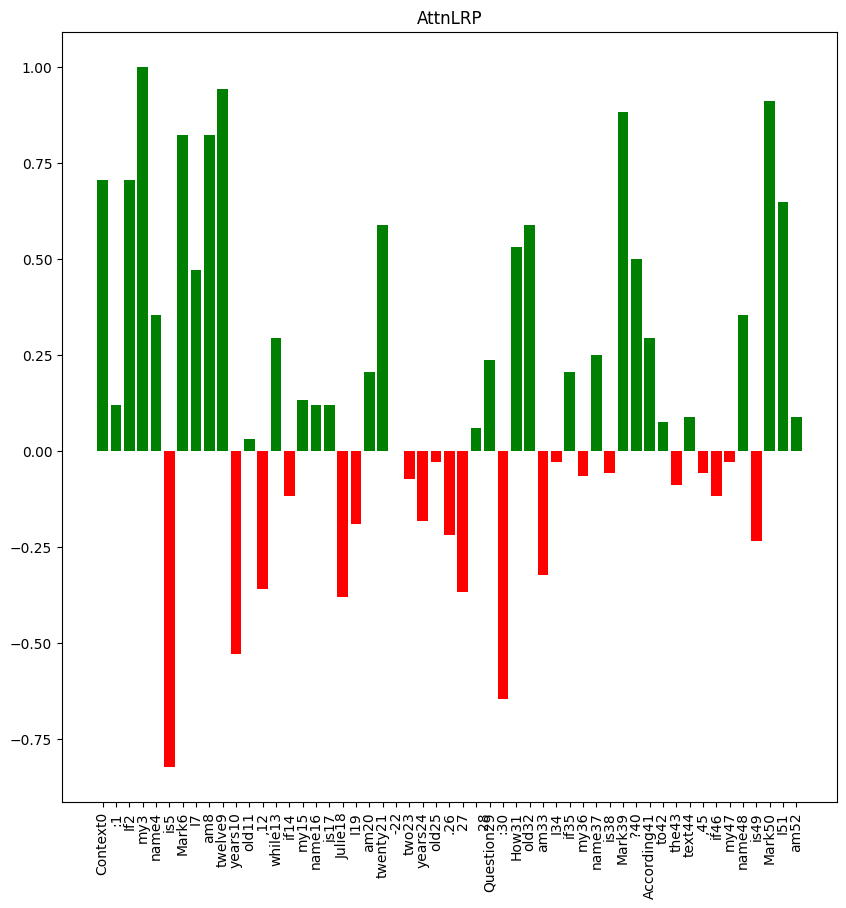

Integrated_Gradients


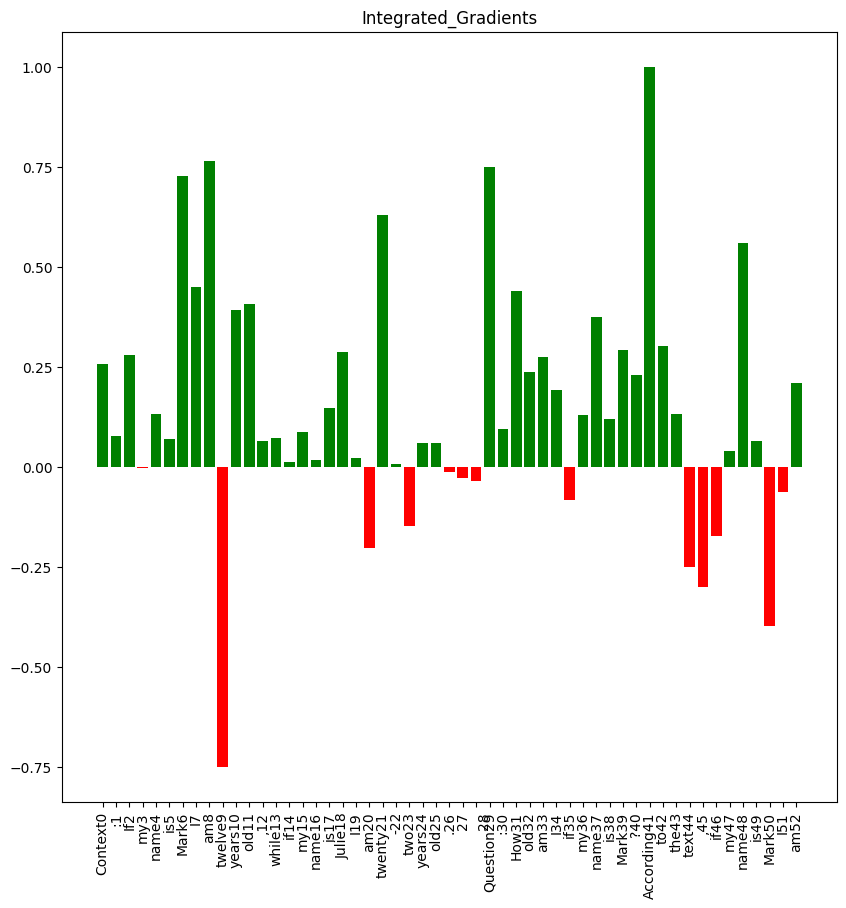

Gradient_X_Input


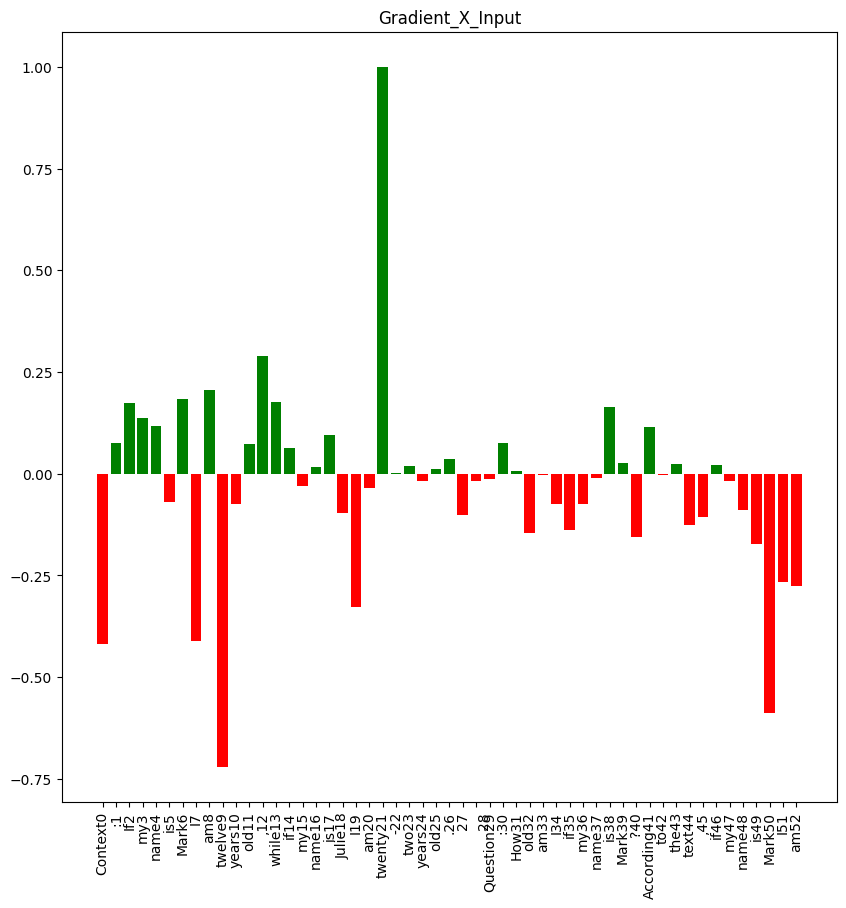

DeepLift


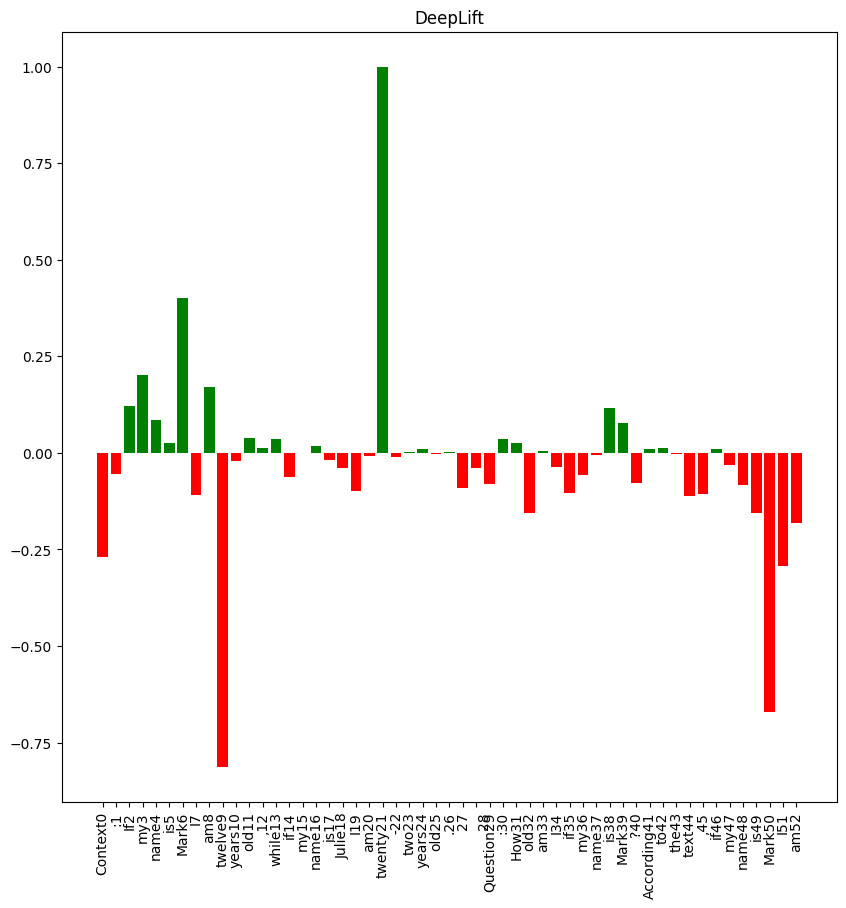

Gradient_Shap


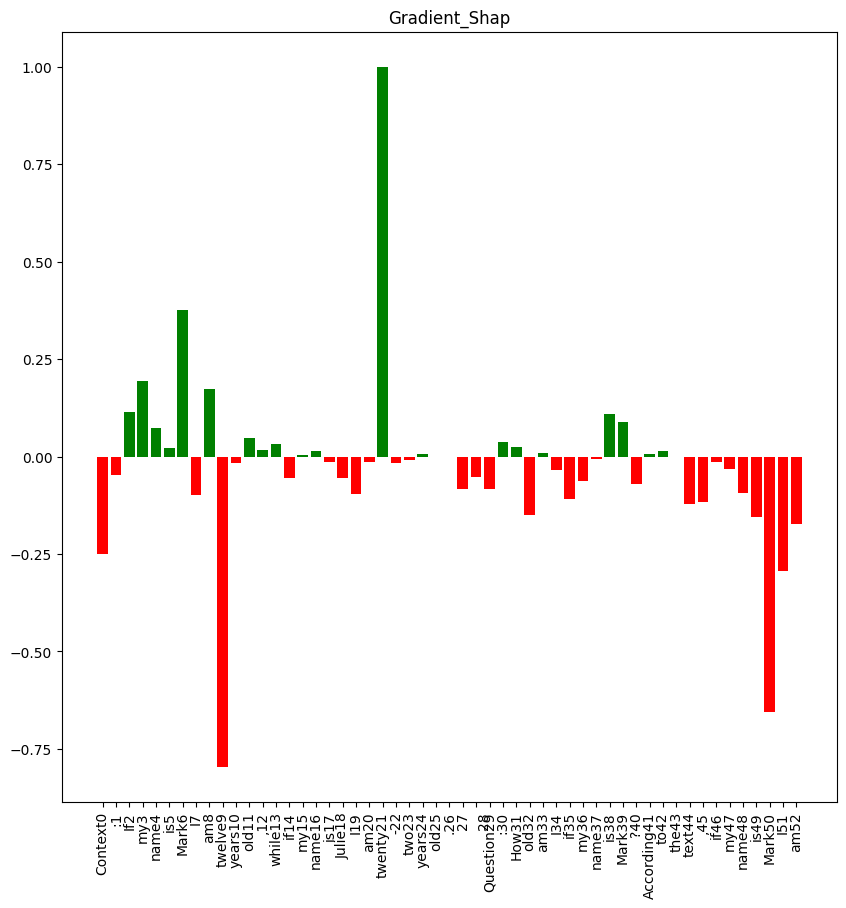

Lime


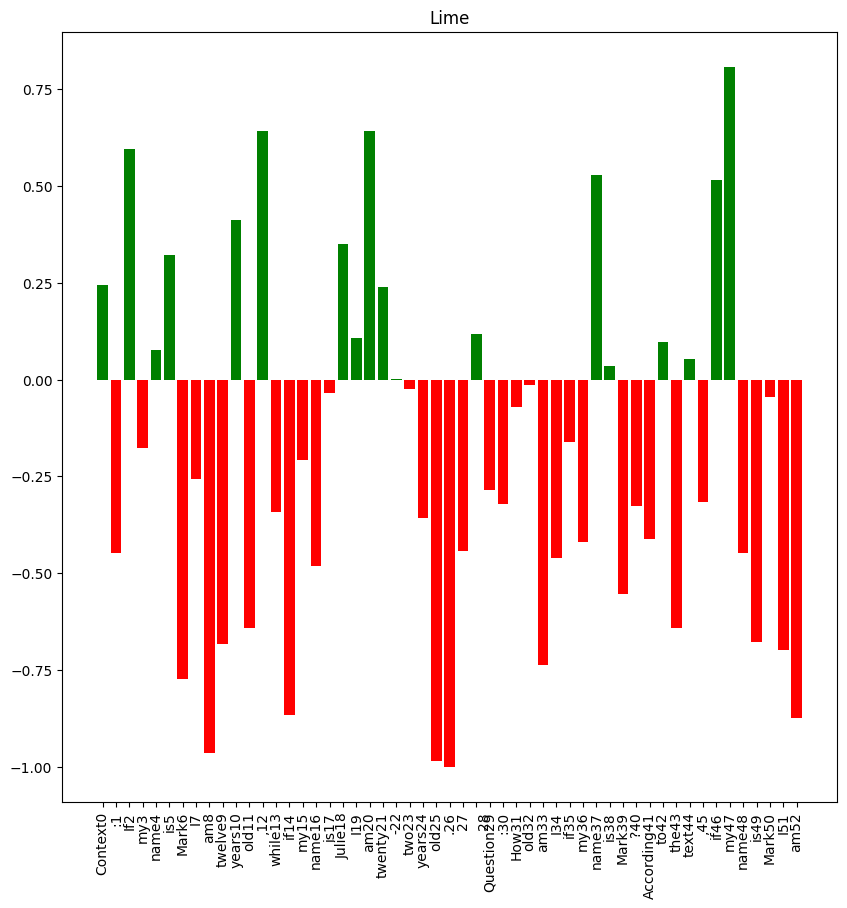

Shap


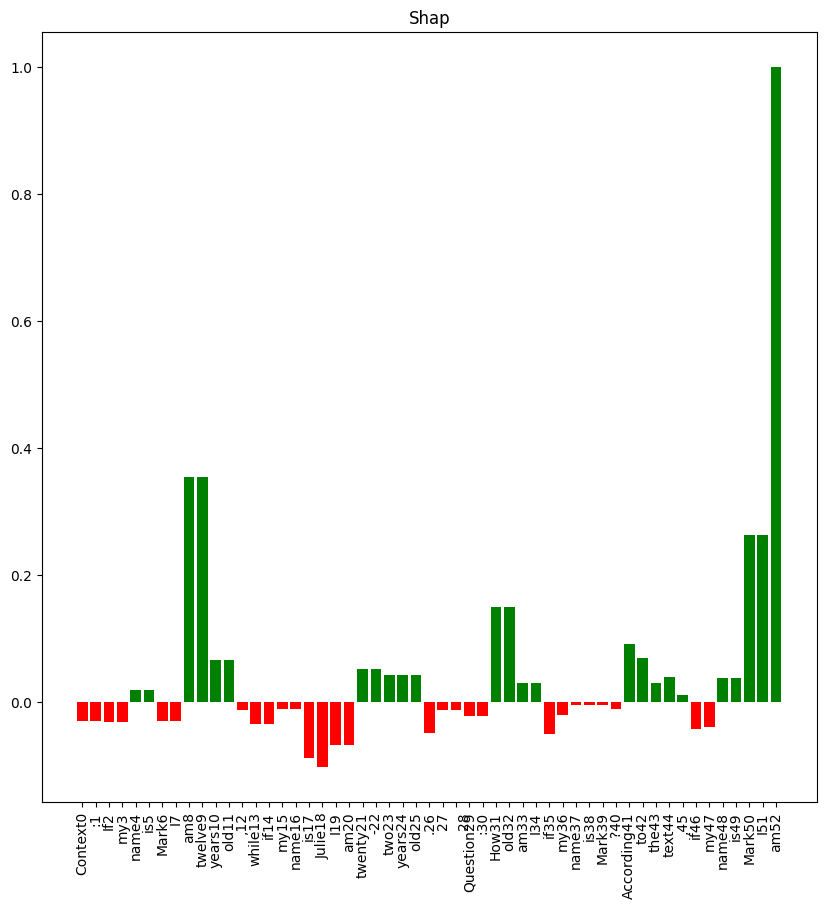

In [21]:
comp.plot(dictionary)

In [ ]:
comp.to_pdf(dictionary, name="years_")

## Everest

In [23]:
prompt = """\
Context: Mount Everest attracts many climbers. After the first reconnaissance expedition by the British in 1921 reached 7,000 m (22,970 ft) on the North Col, the 1922 expedition pushed the north ridge route up to 8,320 m (27,300 ft), marking the first time a human had climbed above 8,000 m (26,247 ft). \
Question: How high did they climb in 1922? According to the text, the 1922 expedition reached"""

In [ ]:
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, "8",  gpt_args)

In [29]:
output

'Context: Mount Everest attracts many climbers. After the first reconnaissance expedition by the British in 1921 reached 7,000 m (22,970 ft) on the North Col, the 1922 expedition pushed the north ridge route up to 8,320 m (27,300 ft), marking the first time a human had climbed above 8,000 m (26,247 ft). Question: How high did they climb in 1922? According to the text, the 1922 expedition reached the summit of Mount Everest at 7,000 m (22,970 ft) on the North Col. The expedition was led by Sir John W. Campbell, a British climber who had been in the Himalayas for more than a century. The expedition was led by Sir John W. Campbell, a British climber who had been in the Himalayas for more than a century. The expedition was led by Sir John W. Campbell, a British climber who had been in the Himalayas for more than a century.'

AttnLRP


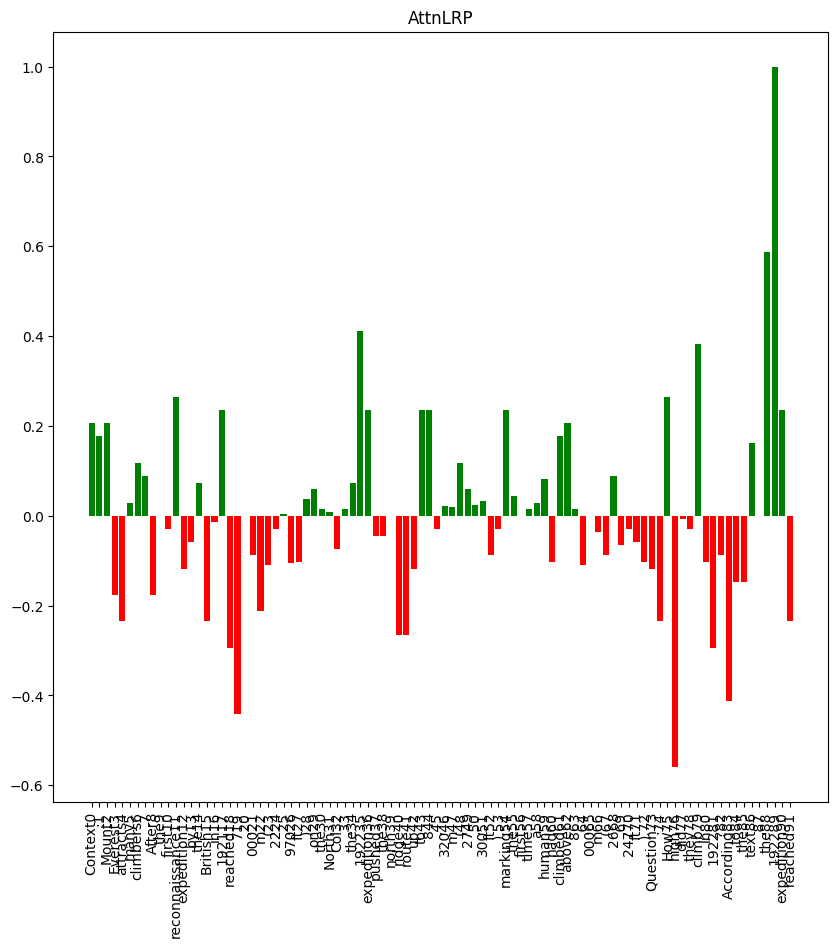

Integrated_Gradients


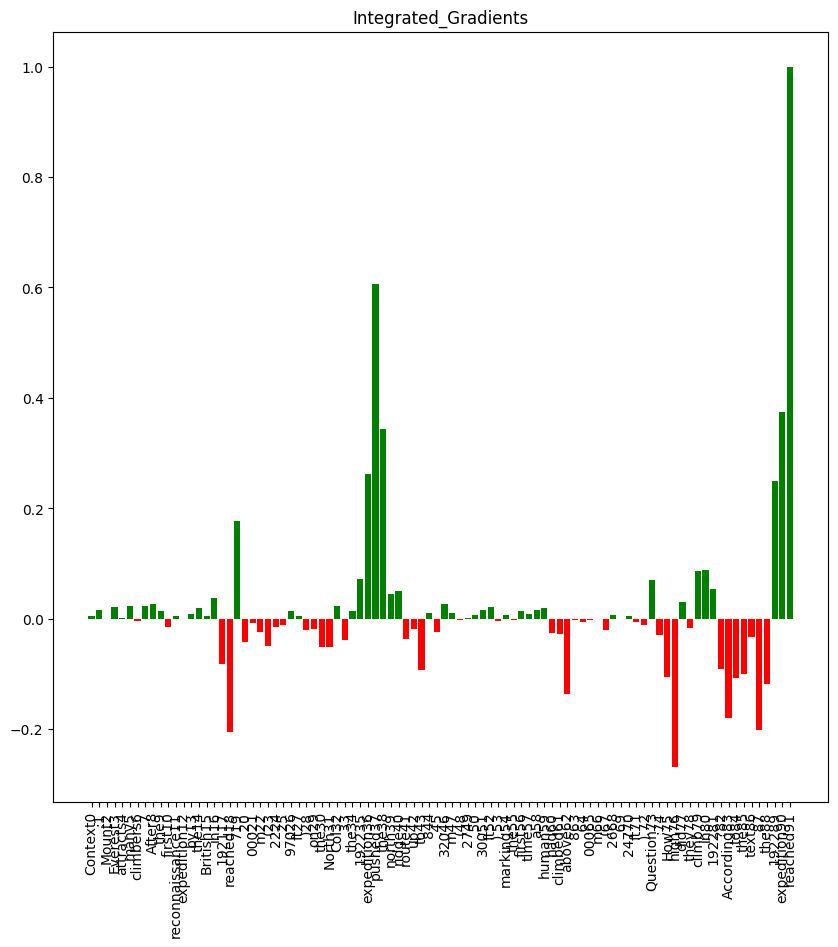

Gradient_X_Input


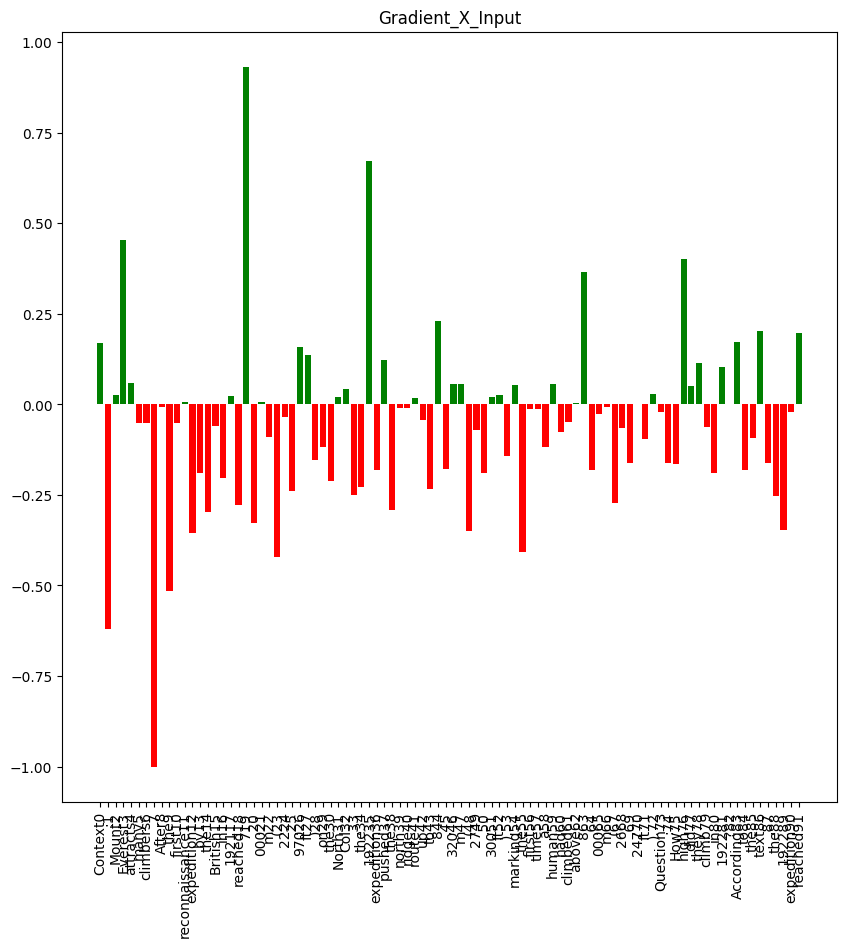

DeepLift


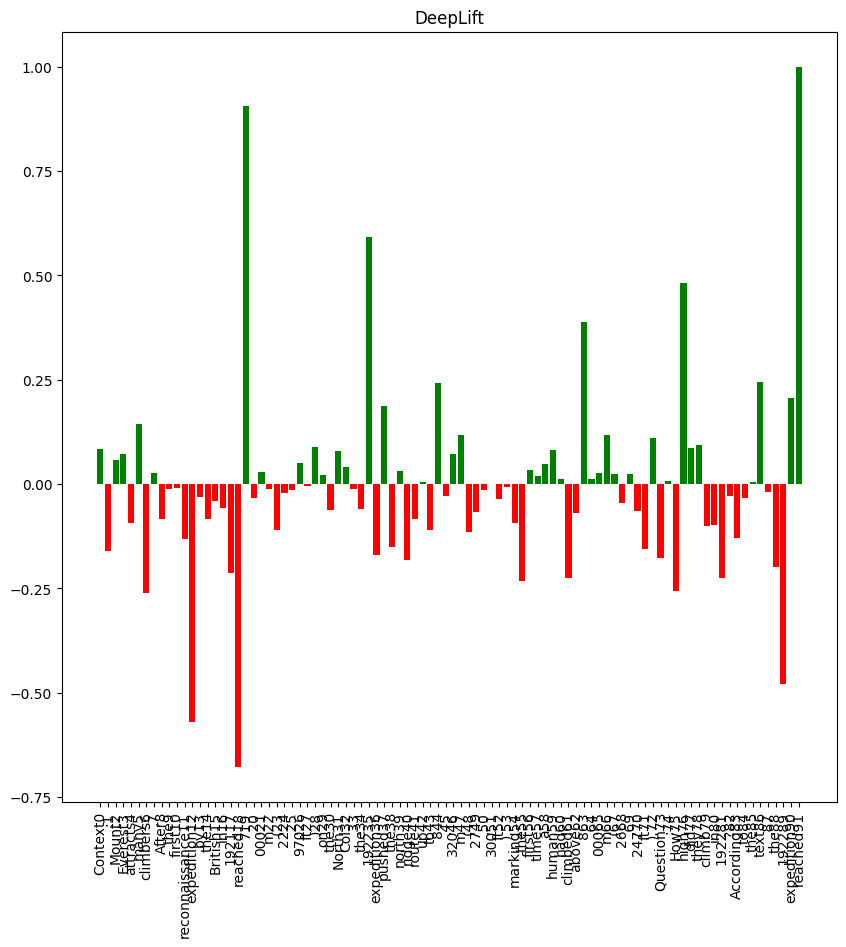

Gradient_Shap


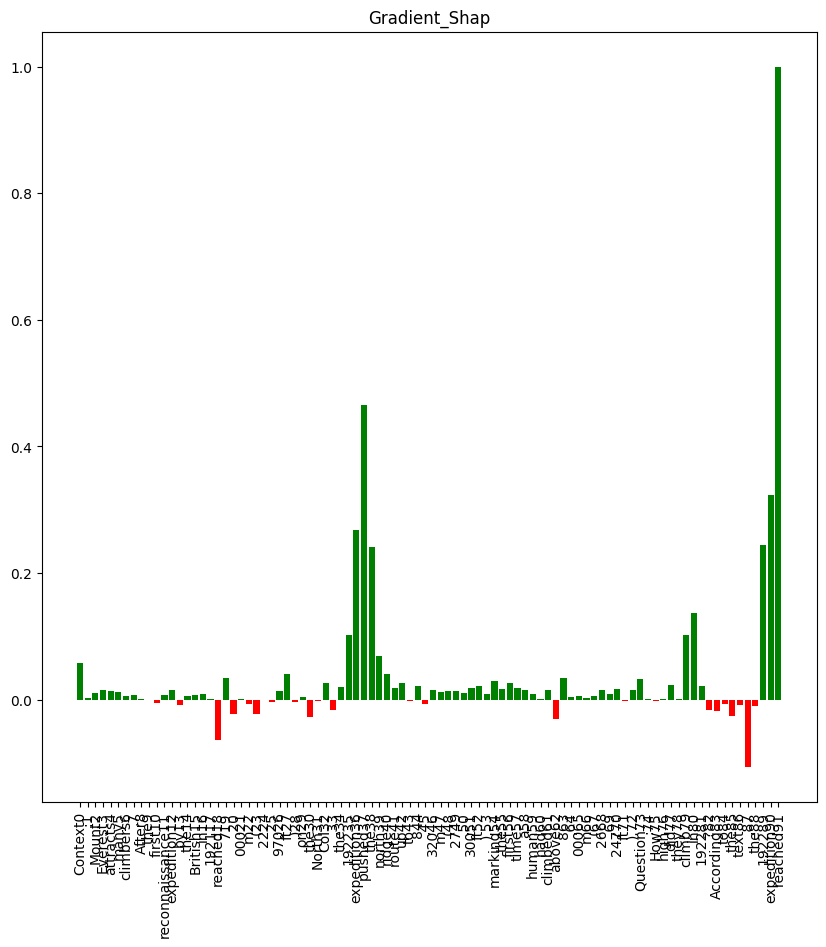

Lime


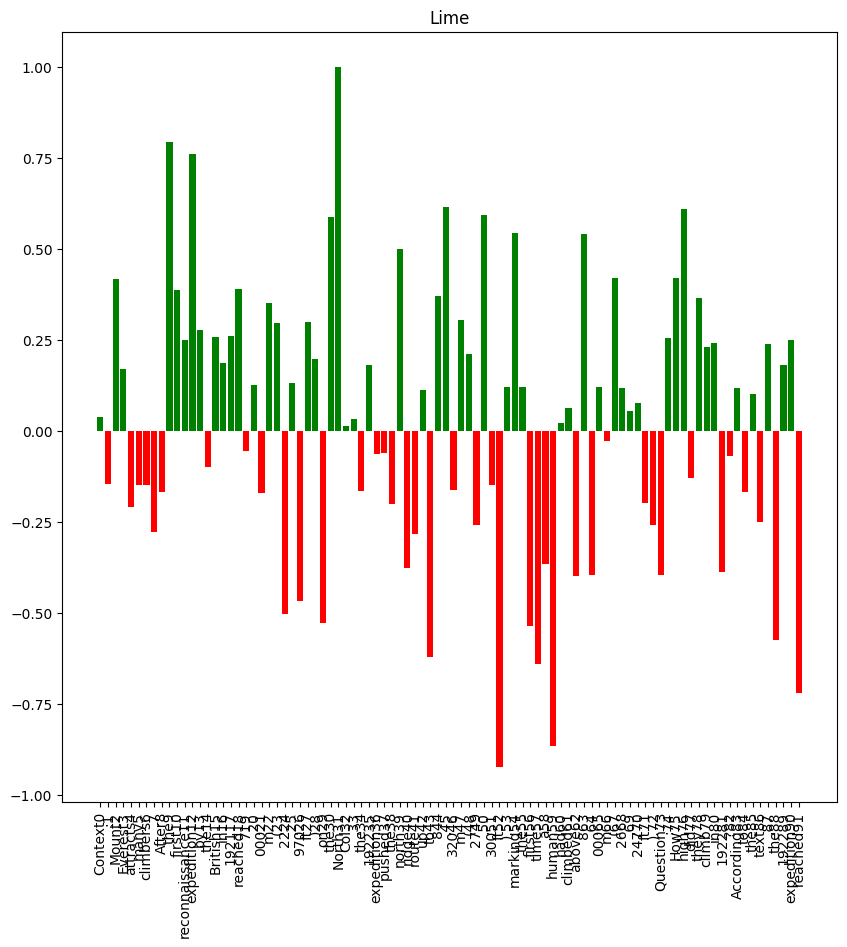

Shap


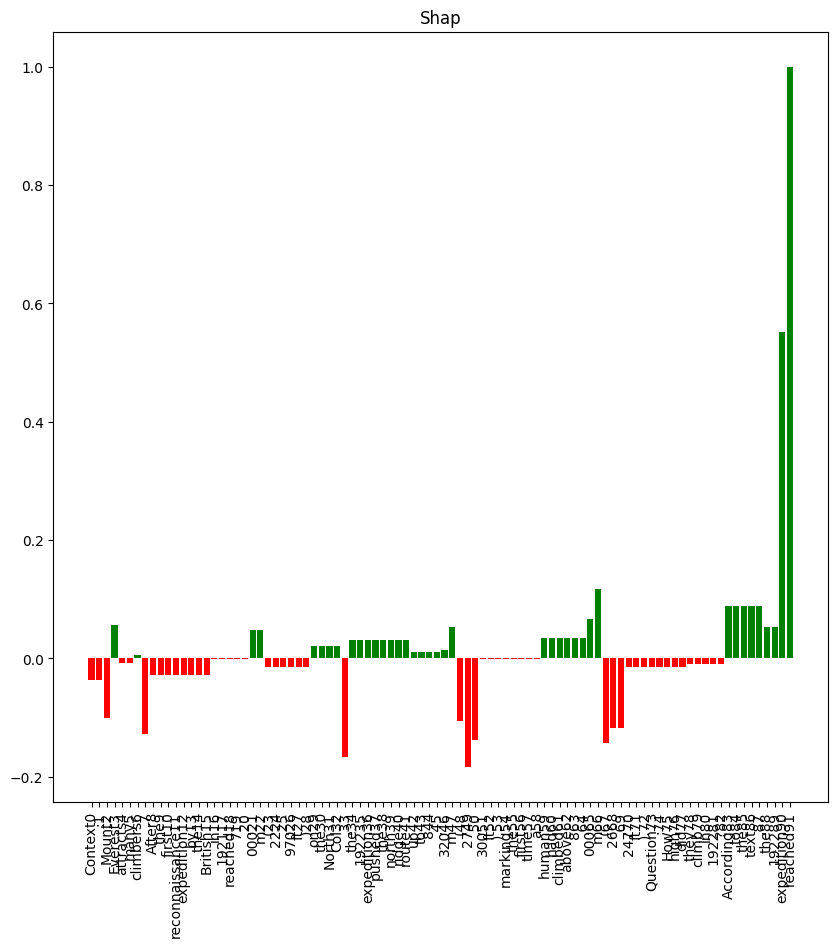

In [30]:
comp.plot(dictionary)

In [ ]:
comp.to_pdf(dictionary, name="Everest")

## IPod

In [32]:
prompt, target = Get_Prompt(2001)

In [ ]:
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, gpt_args)

In [38]:
target

'2009'

In [39]:
output

'Context: On October 21, 2008, Apple reported that only 14.21% of total revenue for fiscal quarter 4 of year 2008 came from iPods. At the September 9, 2009 keynote presentation at the Apple Event, Phil Schiller announced total cumulative sales of iPods exceeded 220 million. The continual decline of iPod sales since 2009 has not been a surprising trend for the Apple corporation, as Apple CFO Peter Oppenheimer explained in June 2009: "We expect our traditional MP3 players to decline over time as we cannibalize ourselves with the iPod Touch and the iPhone." Since 2009, the company\'s iPod sales have continually decreased every financial quarter and in 2013 a new model was not introduced onto the market. Question: From what year did iPod purchases begin to continuously decline? Apple CFO Peter Oppenheimer: In the first quarter of 2009, iPod sales were down by about 10% from the year before. In the second quarter of 2009, iPod sales were up by about 10% from the'

AttnLRP


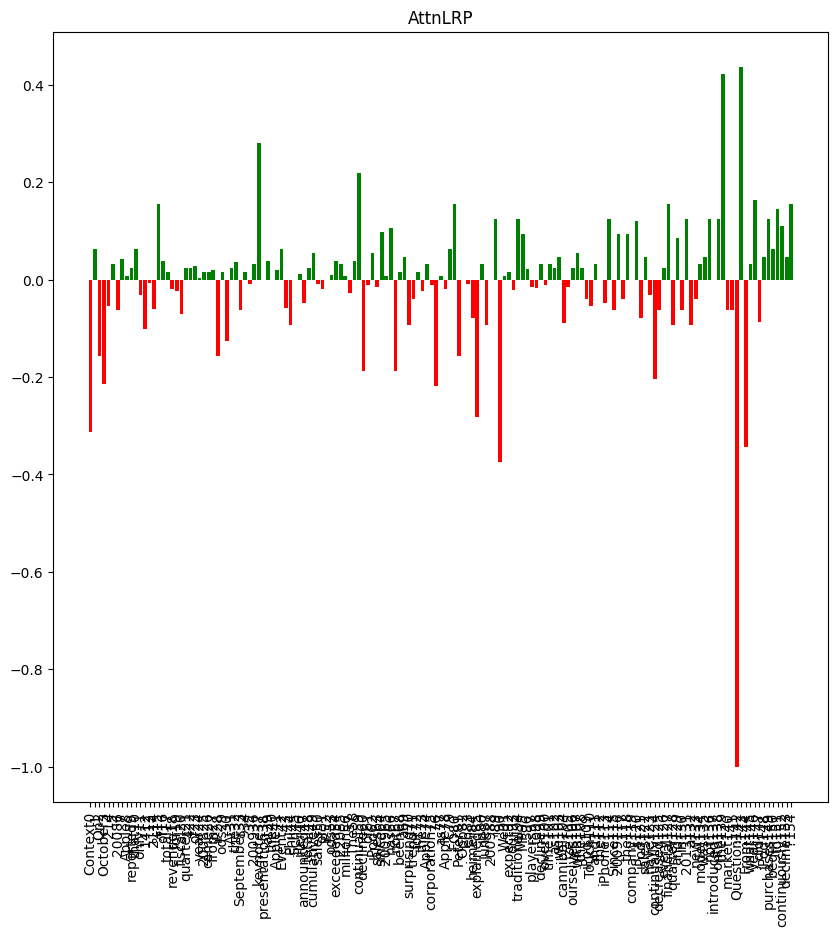

Integrated_Gradients


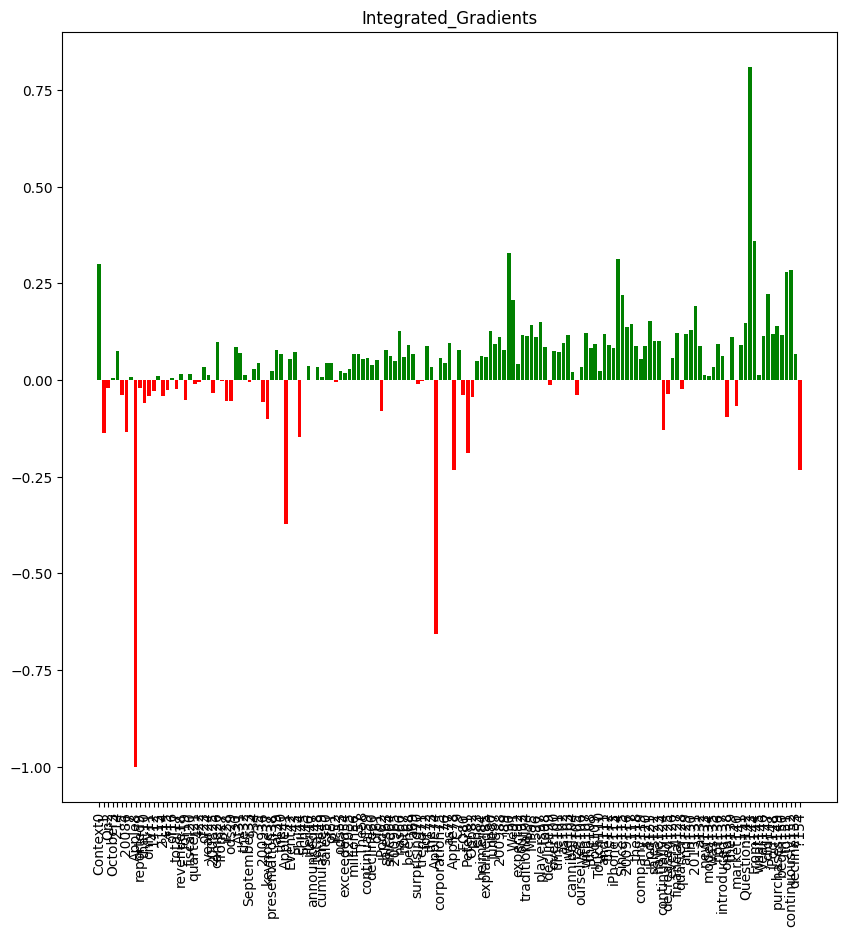

Gradient_X_Input


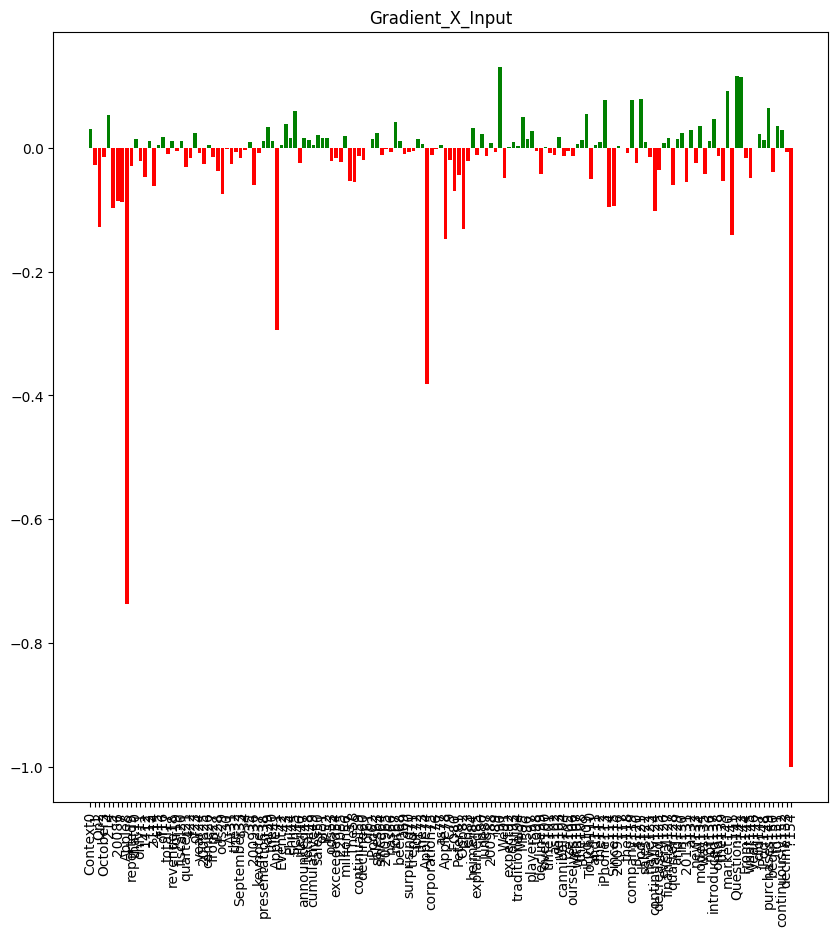

DeepLift


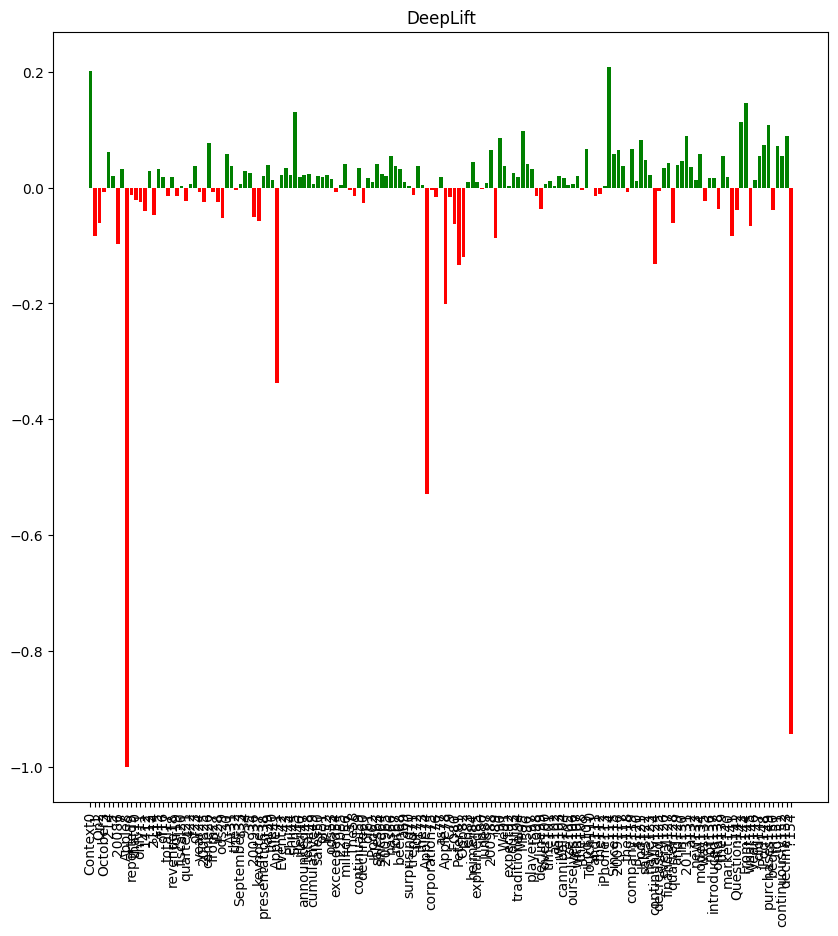

Gradient_Shap


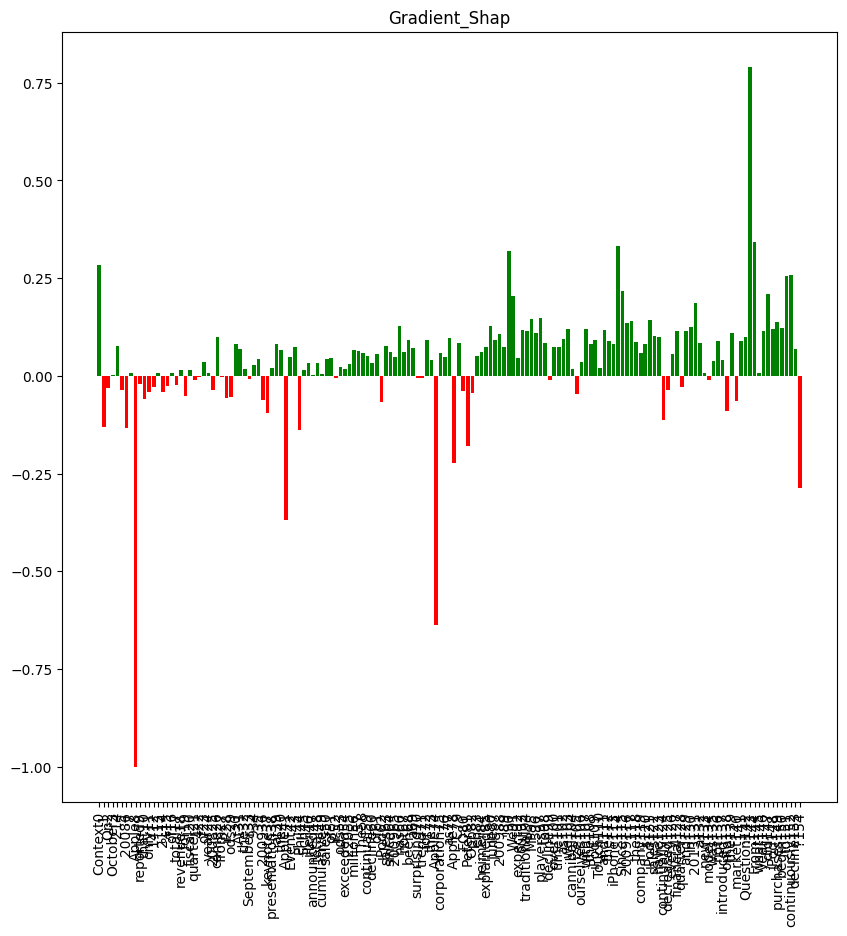

Lime


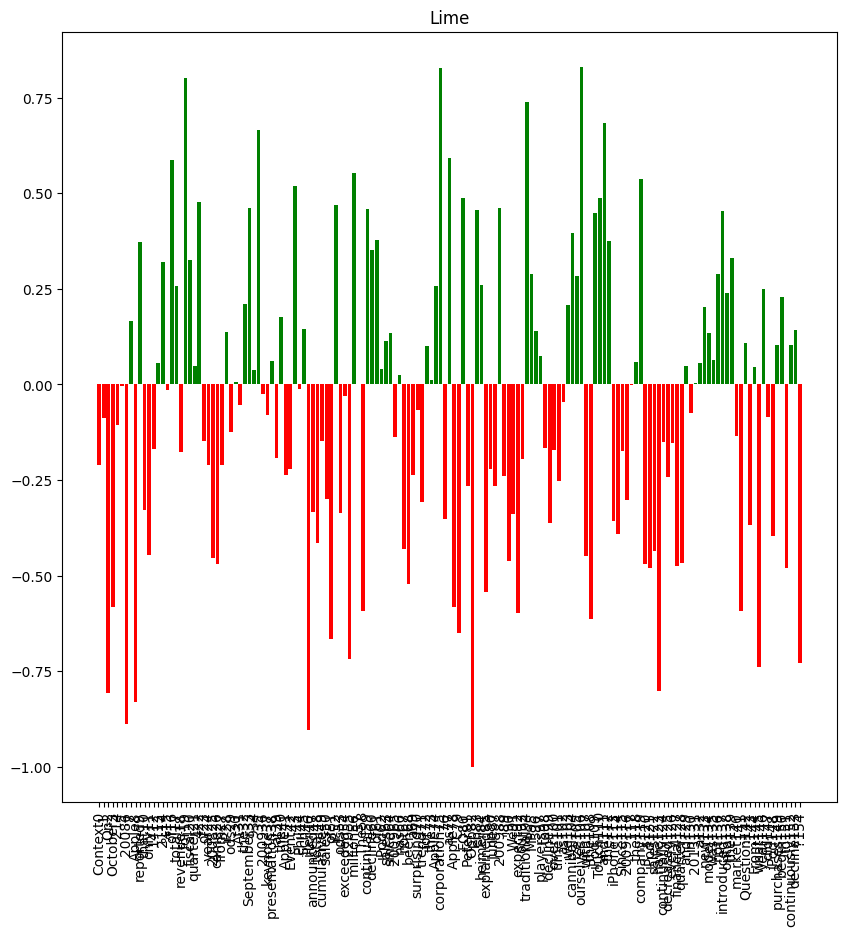

Shap


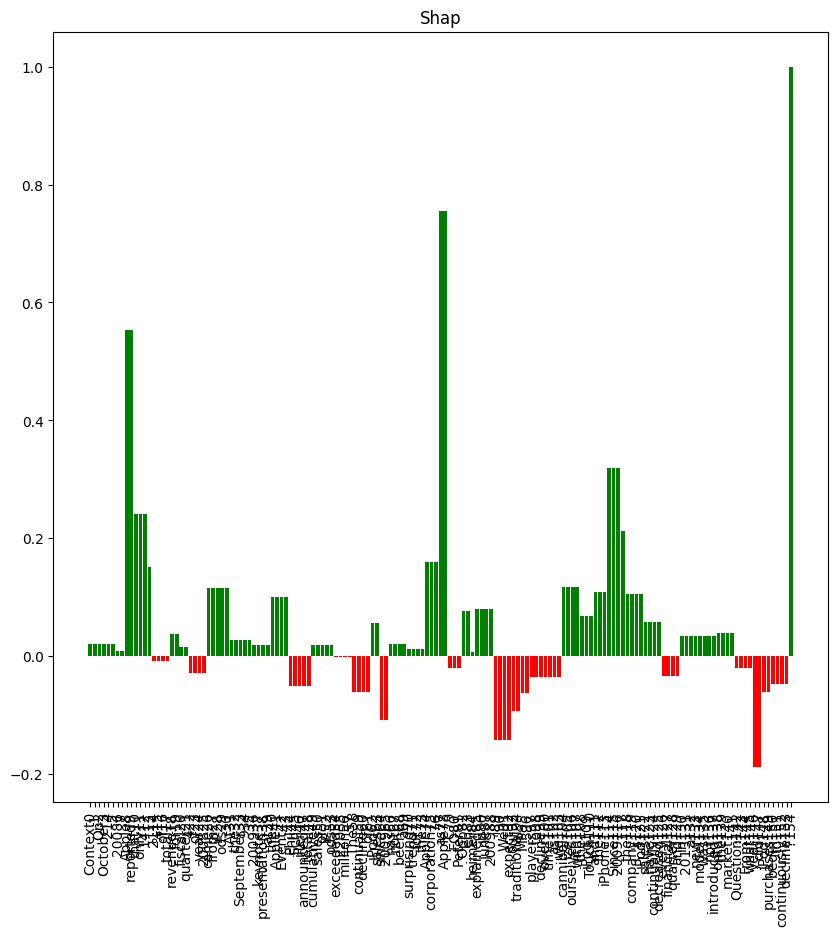

In [41]:
comp.plot(dictionary)

In [ ]:
comp.to_pdf(dictionary, name="Ipod")

## Winnie The Pooh

In [43]:
prompt = """Once upon a time, in the heart of the peaceful Hundred Acre Wood, lived a bear named Winnie-the-Pooh. Pooh's days were often filled with gentle strolls, warm naps, and, of course, indulging in his favorite treat is honey. Which is Pooh's favourite treat? Answer: According to the test the Pooh's favourite treat is"""

In [ ]:
target = prompt + "honey"

In [ ]:
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, gpt_args)

In [50]:
target

"Once upon a time, in the heart of the peaceful Hundred Acre Wood, lived a bear named Winnie-the-Pooh. Pooh's days were often filled with gentle strolls, warm naps, and, of course, indulging in his favorite treat is honey. Which is Pooh's favourite treat? Answer: According to the test the Pooh's favourite treat ishoney"

In [51]:
output

"Once upon a time, in the heart of the peaceful Hundred Acre Wood, lived a bear named Winnie-the-Pooh. Pooh's days were often filled with gentle strolls, warm naps, and, of course, indulging in his favorite treat is honey. Which is Pooh's favourite treat? Answer: According to the test the Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is honey.\n\nThe Pooh's favourite treat is"

AttnLRP


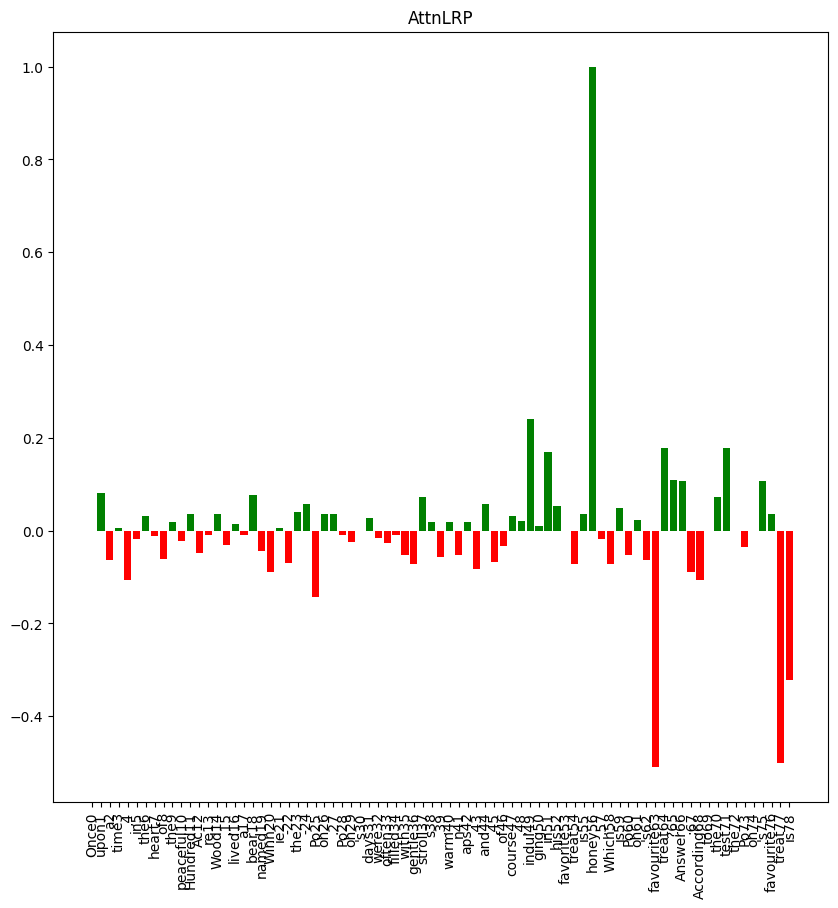

Integrated_Gradients


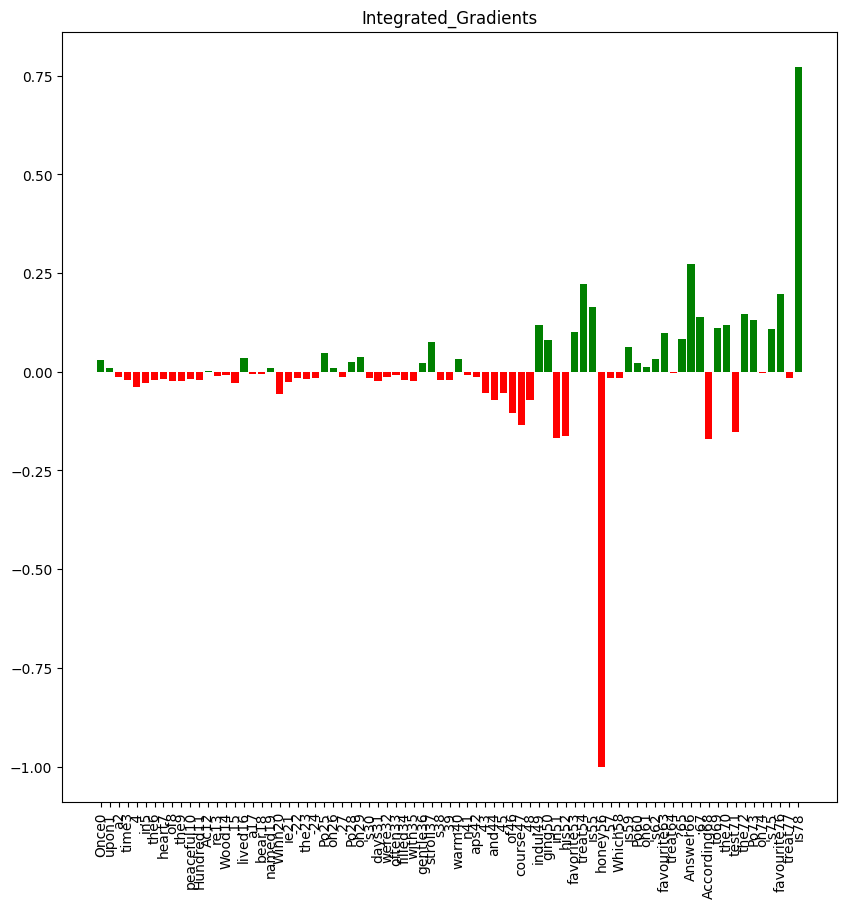

Gradient_X_Input


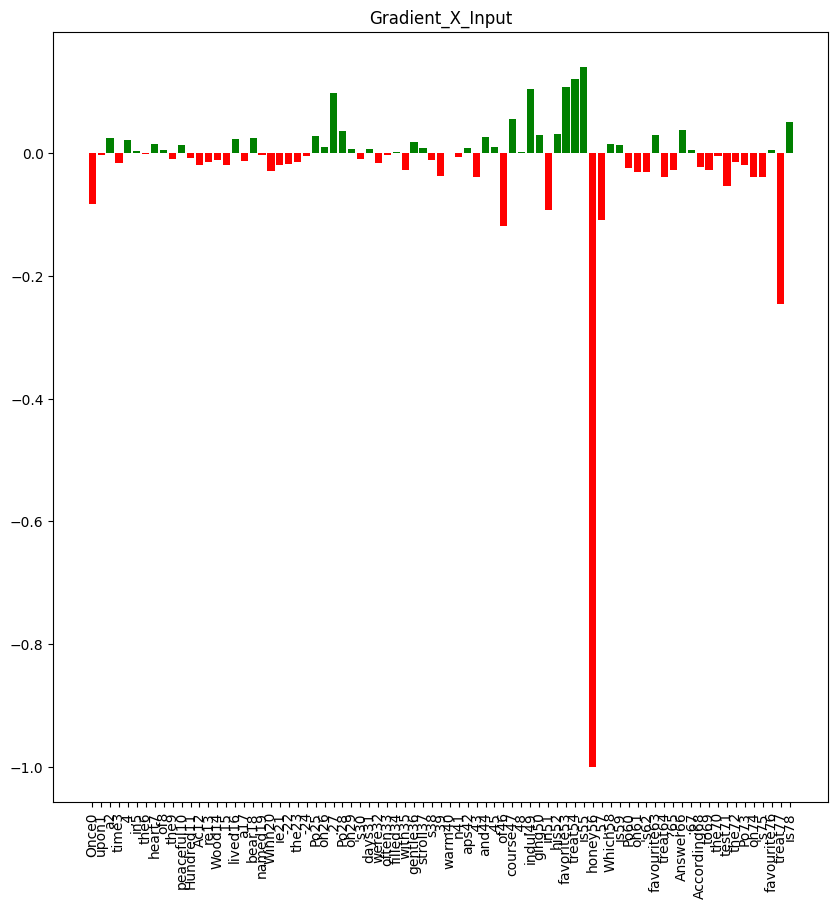

DeepLift


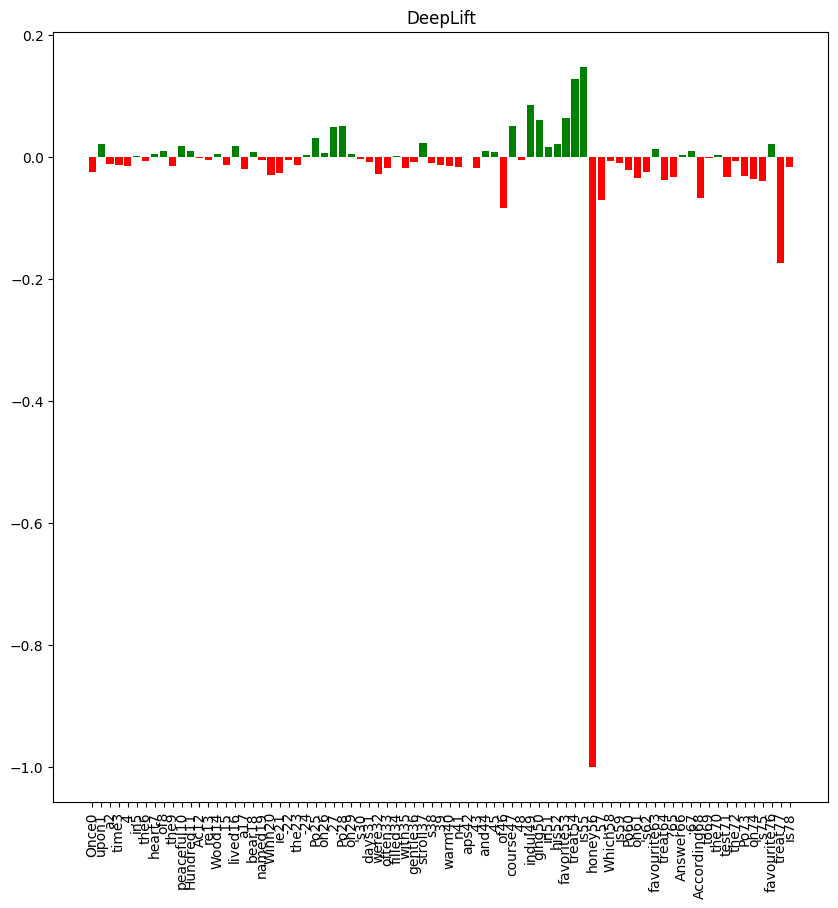

Gradient_Shap


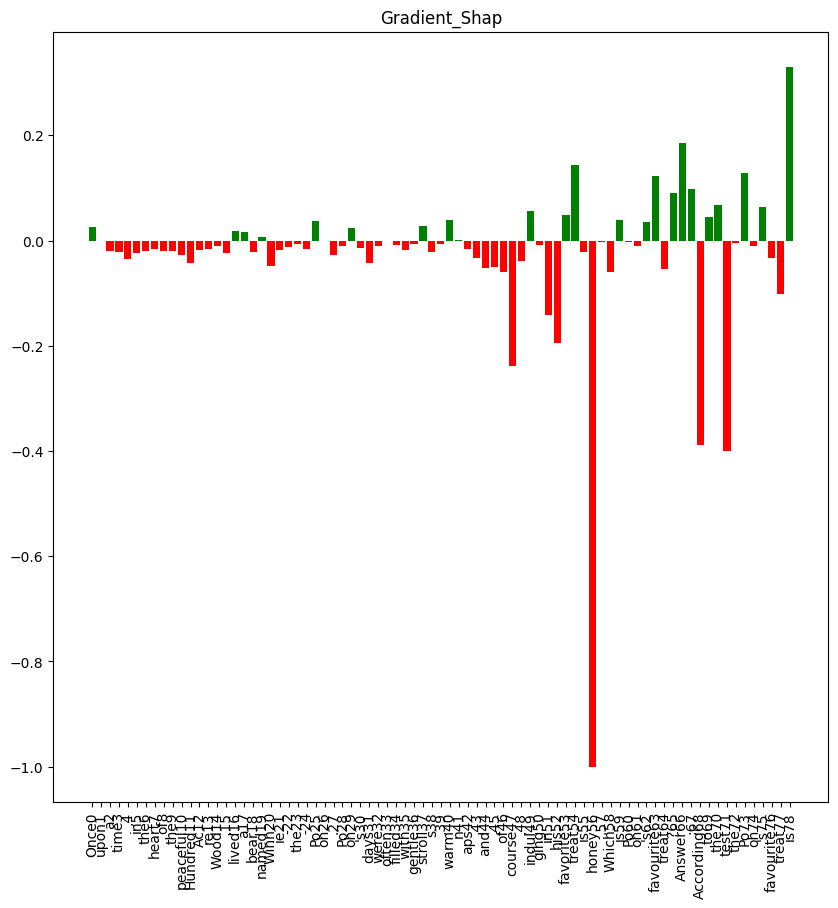

Lime


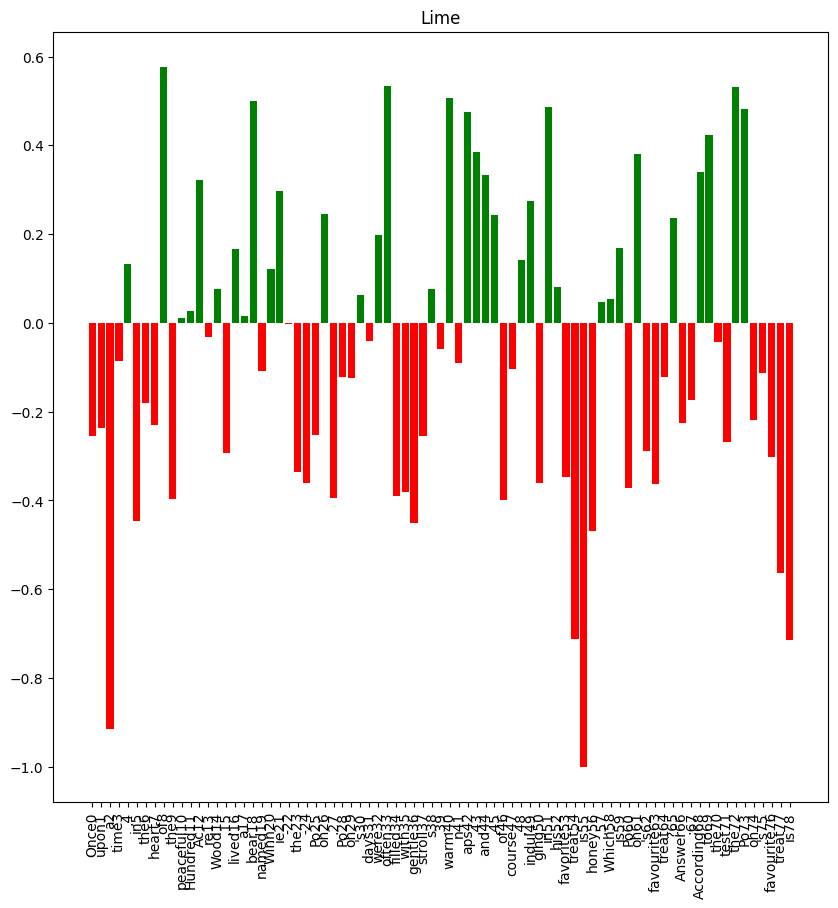

Shap


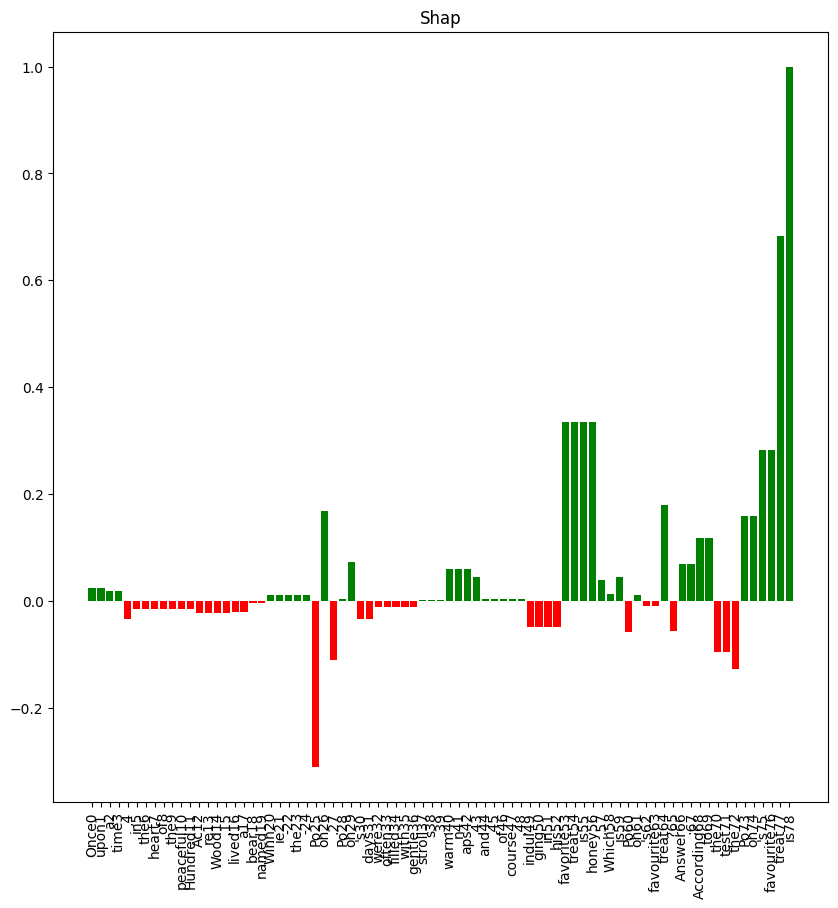

In [53]:
comp.plot(dictionary)

In [ ]:
comp.to_pdf(dictionary, name="Winnie")

## Multiple Answers

In [55]:
prompt = """Context: Mary is decorating the tree for christmas, while Bob is making some gingerbread man.
            Question: Who is decorating the tree?
            Option 1: Bob
            Option 2: Mary
            Option 3: Mom
            Answer: Option"""

In [56]:
target = prompt + " 2"

In [ ]:
comp = Comparison(model_attn, model_integrated, tokenizer)

In [ ]:
dictionary, output = comp(prompt, gpt_args)

In [62]:
target

'Context: Mary is decorating the tree for christmas, while Bob is making some gingerbread man. \n            Question: Who is decorating the tree? Option 1: Bob, Option 2: Mary, Option 3: Mom. \n            Answer: Option 2'

In [63]:
output

'Context: Mary is decorating the tree for christmas, while Bob is making some gingerbread man. \n            Question: Who is decorating the tree? Option 1: Bob, Option 2: Mary, Option 3: Mom. \n            Answer: Option 1: Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob, Bob,'

AttnLRP


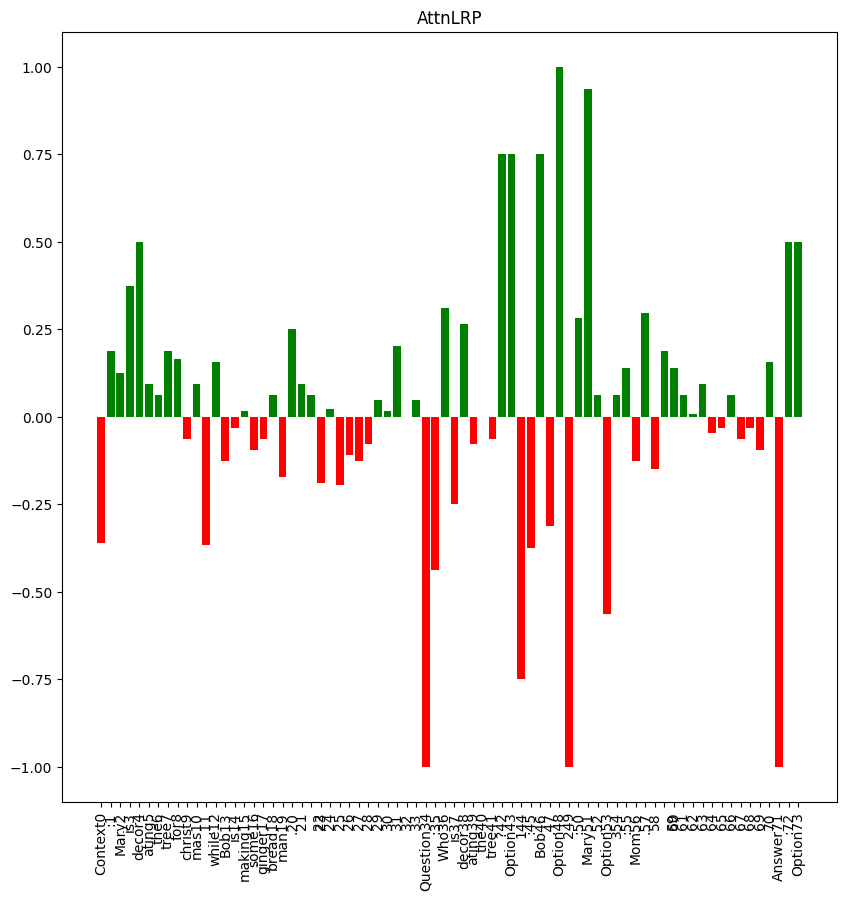

Integrated_Gradients


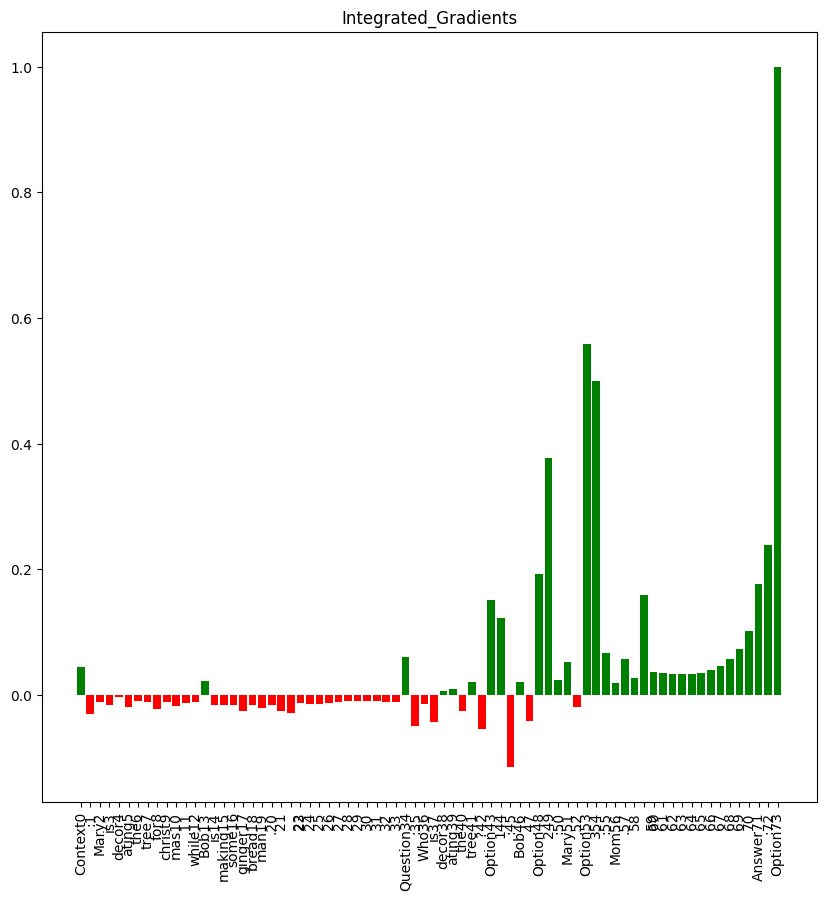

Gradient_X_Input


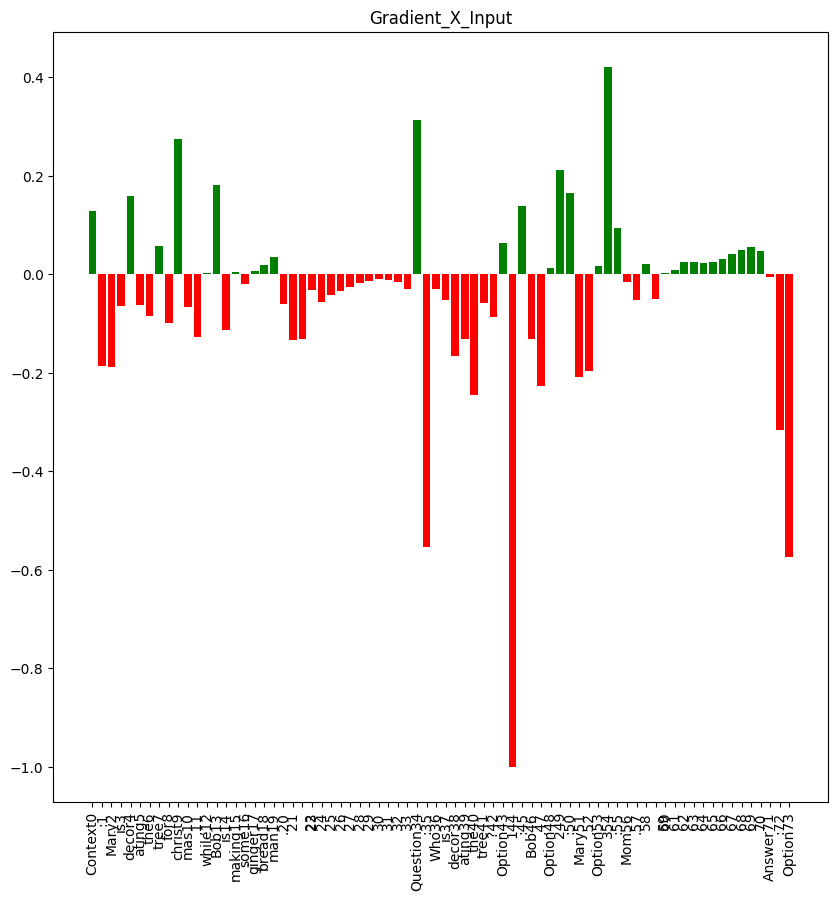

DeepLift


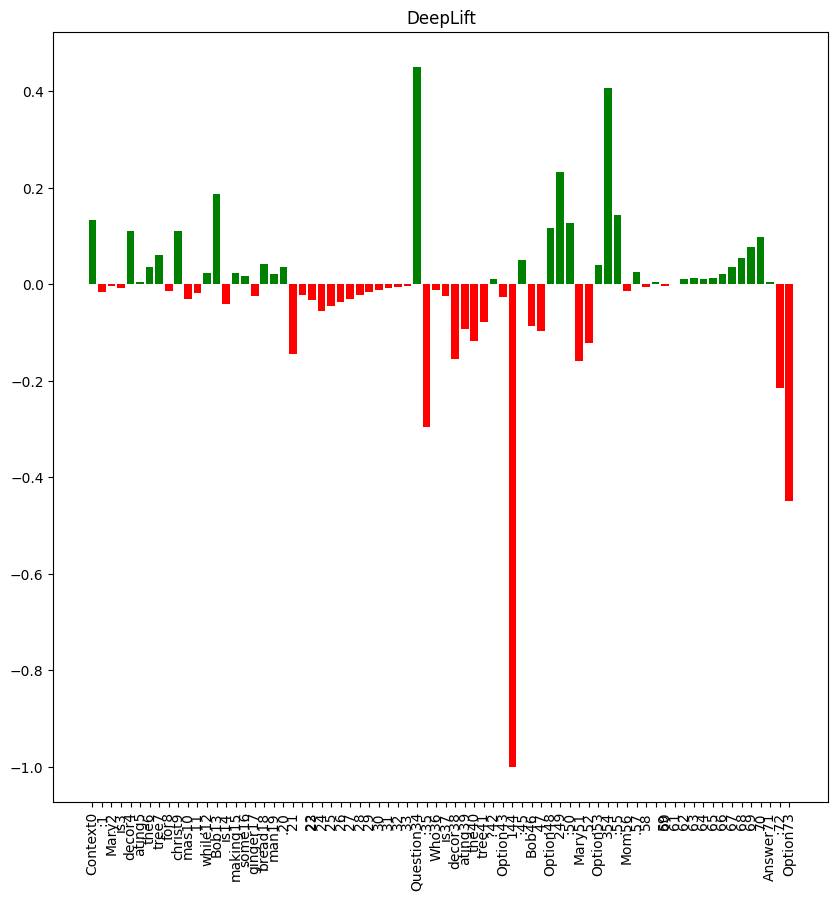

Gradient_Shap


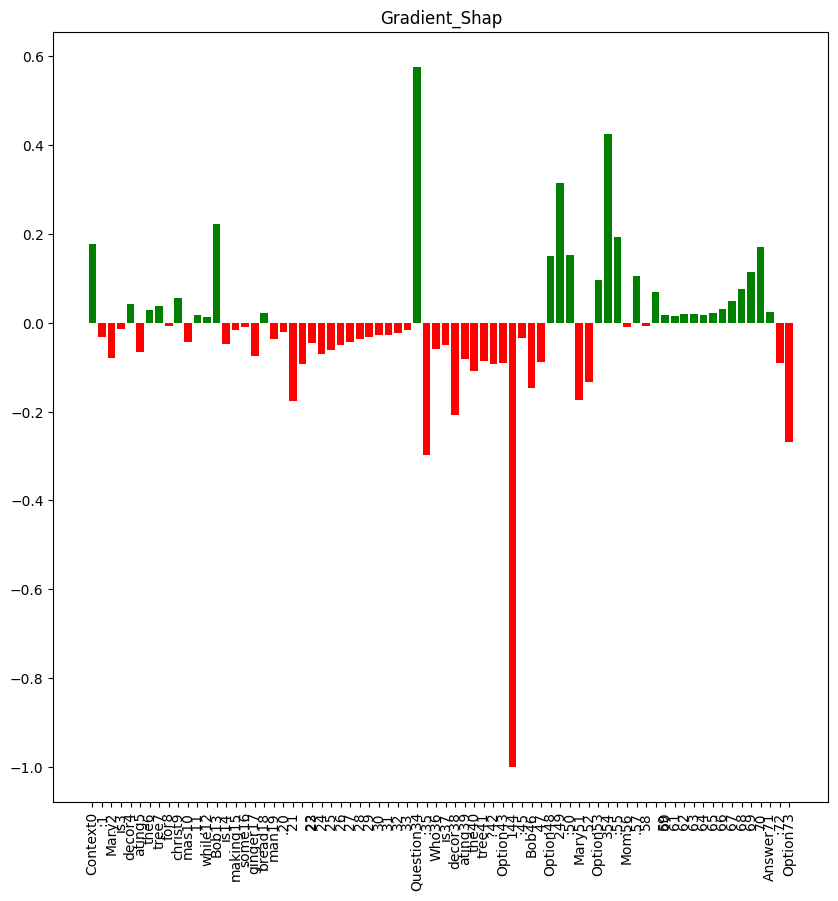

Lime


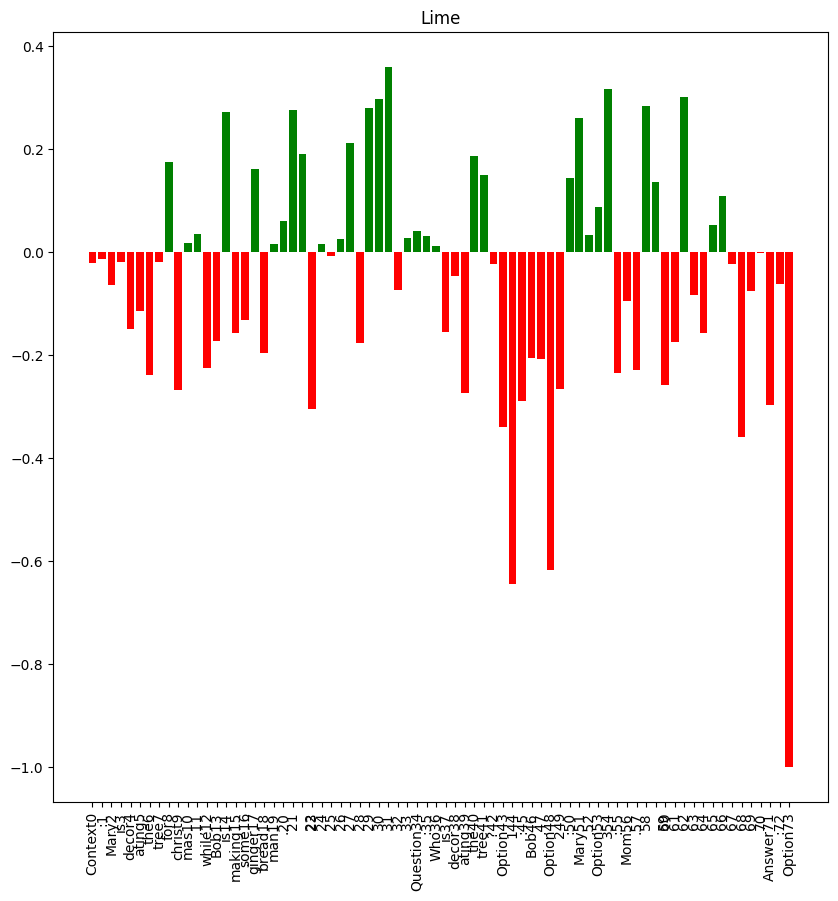

Shap


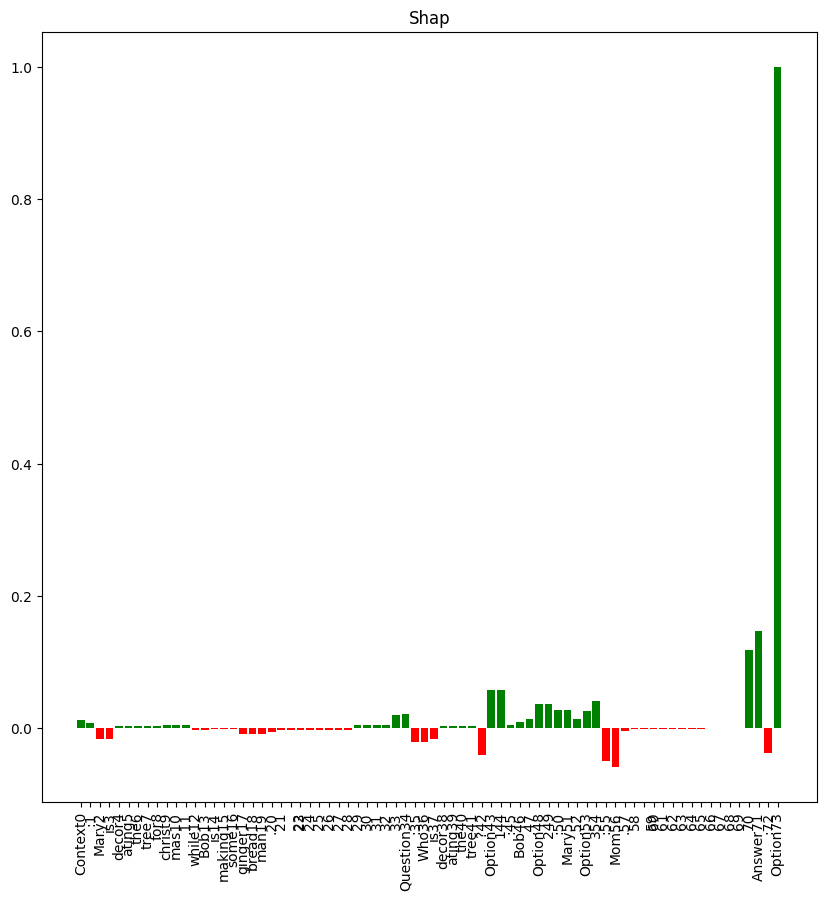

In [65]:
comp.plot(dictionary)

In [ ]:
output[-1]

In [ ]:
comp.to_pdf(dictionary, name="Multiple")